In [28]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from numpy import pi

#Grover 00


qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# A operação de reset retorna um qubit para o estado ∣ 0 ⟩, 
# independentemente de seu estado antes da aplicação da operação. Não é uma operação reversível.

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])

# O portão H, ou Hadamard, gira os estados∣ 0 ⟩ e∣ 1 ⟩ para∣ + ⟩ e ∣ − ⟩, respectivamente.
# É útil para fazer superposições. Se você tiver um portão universal definido em um computador clássico
# e adicionar o portão Hadamard, ele se tornará um portão universal definido em um computador quântico.

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])

# O portão H, ou Hadamard, gira os estados ∣ 0 ⟩ e ∣ 1 ⟩para ∣ + ⟩ e  ∣ − ⟩, respectivamente. É útil para fazer superposições.
# Se você tiver um portão universal definido em um computador clássico e adicionar o portão Hadamard, 
# ele se tornará um portão universal definido em um computador quântico.

circuit.s(qreg_q[0])
circuit.s(qreg_q[1])


# Portão Z controlado.
# Na base computacional, este portão inverte a fase do qubit de destino se o qubit de controle estiver no ∣ 1 ⟩ Estado.
# https://qiskit.org/documentation/stubs/qiskit.circuit.library.CZGate.html

circuit.cz(qreg_q[0], qreg_q[1])

circuit.s(qreg_q[0])
circuit.s(qreg_q[1])

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])

# A porta NOT, também conhecida como porta Pauli X, vira o ∣ 0 ⟩estado para ∣ 1 ⟩, e vice versa. A porta NOT é equivalente a RX para o ângulo π.

circuit.x(qreg_q[0])
circuit.x(qreg_q[1])

circuit.cz(qreg_q[0], qreg_q[1])

circuit.x(qreg_q[0])
circuit.h(qreg_q[0])
circuit.x(qreg_q[1])
circuit.h(qreg_q[1])

circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

In [33]:
simulator = QasmSimulator()

compiled_circuit = transpile(circuit,simulator)

job = simulator.run(compiled_circuit, shots=100)

result = job.result()

counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'00': 100}


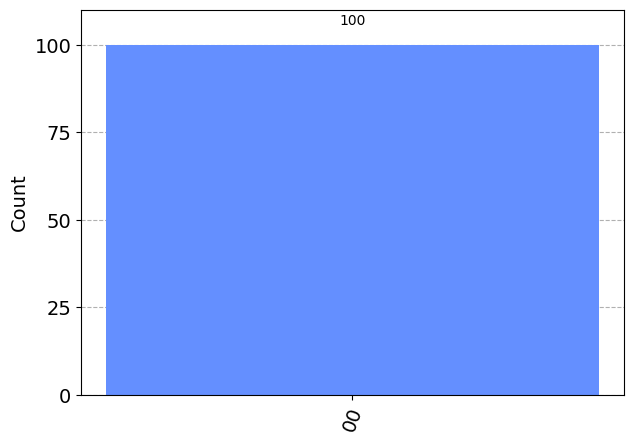

In [34]:
plot_histogram(counts)

In [31]:
circuit.draw()

┌───┐┌───┐   ┌───┐┌───┐┌───┐   ┌───┐┌───┐┌─┐   
q_0: ─|0>─┤ H ├┤ S ├─■─┤ S ├┤ H ├┤ X ├─■─┤ X ├┤ H ├┤M├───
          ├───┤├───┤ │ ├───┤├───┤├───┤ │ ├───┤├───┤└╥┘┌─┐
q_1: ─|0>─┤ H ├┤ S ├─■─┤ S ├┤ H ├┤ X ├─■─┤ X ├┤ H ├─╫─┤M├
          └───┘└───┘   └───┘└───┘└───┘   └───┘└───┘ ║ └╥┘
c: 2/═══════════════════════════════════════════════╩══╩═
                                                    0  1

In [ ]:
#Grover 01


qreg_q_2 = QuantumRegister(2, 'q')
creg_c_2 = ClassicalRegister(2, 'c')
circuit_2 = QuantumCircuit(qreg_q_2, creg_c_2)

circuit_2.reset(qreg_q_2[0])
circuit_2.reset(qreg_q_2[1])
circuit_2.h(qreg_q_2[0])
circuit_2.h(qreg_q_2[1])
circuit_2.s(qreg_q_2[0])
circuit_2.cz(qreg_q_2[0], qreg_q_2[1])
circuit_2.s(qreg_q_2[0])
circuit_2.h(qreg_q_2[1])
circuit_2.h(qreg_q_2[0])
circuit_2.x(qreg_q_2[1])
circuit_2.x(qreg_q_2[0])
circuit_2.cz(qreg_q_2[0], qreg_q_2[1])
circuit_2.x(qreg_q_2[0])
circuit_2.h(qreg_q_2[0])
circuit_2.x(qreg_q_2[1])
circuit_2.h(qreg_q_2[1])
circuit_2.measure(qreg_q_2[0], creg_c_2[0])
circuit_2.measure(qreg_q_2[1], creg_c_2[1])

In [ ]:
circuit_2.draw()

┌───┐┌───┐   ┌───┐┌───┐┌───┐   ┌───┐┌───┐┌─┐   
q_0: ─|0>─┤ H ├┤ S ├─■─┤ S ├┤ H ├┤ X ├─■─┤ X ├┤ H ├┤M├───
          ├───┤└───┘ │ ├───┤├───┤└───┘ │ ├───┤├───┤└╥┘┌─┐
q_1: ─|0>─┤ H ├──────■─┤ H ├┤ X ├──────■─┤ X ├┤ H ├─╫─┤M├
          └───┘        └───┘└───┘        └───┘└───┘ ║ └╥┘
c: 2/═══════════════════════════════════════════════╩══╩═
                                                    0  1

In [ ]:
#Grover 10

qreg_q_3 = QuantumRegister(2, 'q')
creg_c_3 = ClassicalRegister(2, 'c')
circuit_3 = QuantumCircuit(qreg_q_3, creg_c_3)

circuit_3.reset(qreg_q_3[0])
circuit_3.reset(qreg_q_3[1])
circuit_3.h(qreg_q_3[0])
circuit_3.h(qreg_q_3[1])
circuit_3.s(qreg_q_3[1])
circuit_3.cz(qreg_q_3[0], qreg_q_3[1])
circuit_3.h(qreg_q_3[0])
circuit_3.s(qreg_q_3[1])
circuit_3.x(qreg_q_3[0])
circuit_3.h(qreg_q_3[1])
circuit_3.x(qreg_q_3[1])
circuit_3.cz(qreg_q_3[0], qreg_q_3[1])
circuit_3.x(qreg_q_3[0])
circuit_3.h(qreg_q_3[0])
circuit_3.x(qreg_q_3[1])
circuit_3.h(qreg_q_3[1])
circuit_3.measure(qreg_q_3[0], creg_c_3[0])
circuit_3.measure(qreg_q_3[1], creg_c_3[1])

circuit_3.draw()

┌───┐        ┌───┐┌───┐        ┌───┐┌───┐┌─┐   
q_0: ─|0>─┤ H ├──────■─┤ H ├┤ X ├──────■─┤ X ├┤ H ├┤M├───
          ├───┤┌───┐ │ ├───┤├───┤┌───┐ │ ├───┤├───┤└╥┘┌─┐
q_1: ─|0>─┤ H ├┤ S ├─■─┤ S ├┤ H ├┤ X ├─■─┤ X ├┤ H ├─╫─┤M├
          └───┘└───┘   └───┘└───┘└───┘   └───┘└───┘ ║ └╥┘
c: 2/═══════════════════════════════════════════════╩══╩═
                                                    0  1

In [ ]:
#Grover 11 ERROR

qreg_q_4 = QuantumRegister(2, 'q')
creg_c_4 = ClassicalRegister(2, 'c')
circuit_4 = QuantumCircuit(qreg_q_4, creg_c_4)

circuit_4.reset(qreg_q_4[0])
circuit_4.reset(qreg_q_4[1])
circuit_4.h(qreg_q_4[0])
circuit_4.h(qreg_q_4[1])
circuit_4.cz(qreg_q_4[1], qreg_q_4[0])
circuit_4.h(qreg_q_4[0])
circuit_4.h(qreg_q_4[1])
circuit_4.z(qreg_q_4[0])
circuit_4.z(qreg_q_4[1])
circuit_4.cz(qreg_q_4[1], qreg_q_4[0])
circuit_4.h(qreg_q_4[0])
circuit_4.measure(qreg_q_4[0], creg_c_4[0])
circuit_4.measure(qreg_q_4[1], creg_c_4[1])

circuit_4.draw()

┌───┐   ┌───┐┌───┐   ┌───┐┌─┐
q_0: ─|0>─┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├┤M├
          ├───┤ │ ├───┤├───┤ │ └┬─┬┘└╥┘
q_1: ─|0>─┤ H ├─■─┤ H ├┤ Z ├─■──┤M├──╫─
          └───┘   └───┘└───┘    └╥┘  ║ 
c: 2/════════════════════════════╩═══╩═
                                 1   0

In [ ]:
qreg_q_5 = QuantumRegister(2, 'q')
creg_c_5 = ClassicalRegister(2, 'c')
circuit_5 = QuantumCircuit(qreg_q_5, creg_c_5)

circuit_5.reset(qreg_q_5[0])
circuit_5.reset(qreg_q_5[1])
circuit_5.h(qreg_q_5[0])
circuit_5.h(qreg_q_5[1])
circuit_5.cz(qreg_q_5[1], qreg_q_5[0])
circuit_5.h(qreg_q_5[0])
circuit_5.h(qreg_q_5[1])
circuit_5.x(qreg_q_5[0])
circuit_5.x(qreg_q_5[1])
circuit_5.cz(qreg_q_5[1], qreg_q_5[0])
circuit_5.x(qreg_q_5[0])
circuit_5.x(qreg_q_5[1])
circuit_5.h(qreg_q_5[0])
circuit_5.h(qreg_q_5[1])
circuit_5.measure(qreg_q_5[1], creg_c_5[1])
circuit_5.measure(qreg_q_5[0], creg_c_5[0])

circuit_5.draw()

┌───┐   ┌───┐┌───┐   ┌───┐┌───┐   ┌─┐
q_0: ─|0>─┤ H ├─■─┤ H ├┤ X ├─■─┤ X ├┤ H ├───┤M├
          ├───┤ │ ├───┤├───┤ │ ├───┤├───┤┌─┐└╥┘
q_1: ─|0>─┤ H ├─■─┤ H ├┤ X ├─■─┤ X ├┤ H ├┤M├─╫─
          └───┘   └───┘└───┘   └───┘└───┘└╥┘ ║ 
c: 2/═════════════════════════════════════╩══╩═
                                          1  0

In [ ]:
simulator = QasmSimulator()

compiled_circuit = transpile(circuit_5,simulator)

job = simulator.run(compiled_circuit, shots=100)

result = job.result()

counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'11': 100}


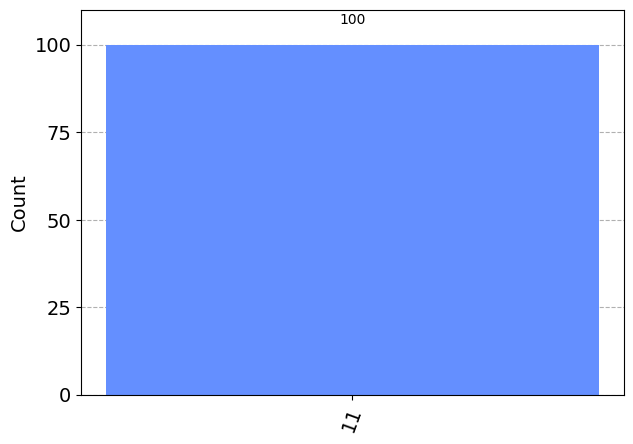

In [32]:
plot_histogram(counts)